In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os

from oudelaar_tiled_capture_2019 import config

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [9]:
input_dir = config.in_data_raw('cite-seq/RNA/citeseq180912/outs/filtered_gene_bc_matrices/mm10/')
counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
genes = np.array(scr.load_genes(input_dir + 'genes.tsv', delimiter='\t', column=1))

print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 7863 rows, 27998 columns
Number of genes in gene list: 27998


In [10]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)

In [11]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Automatically set threshold at doublet score = 0.27
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 46.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.8%
Elapsed time: 23.3 seconds


/t1-data/user/rbeagrie/.virtualenvs/oudelaar-tiled-capture-2019/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


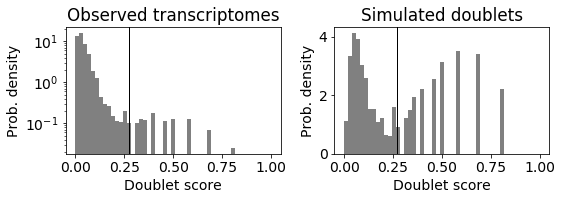

In [12]:
scrub.plot_histogram();


In [13]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...


/t1-data/user/rbeagrie/.virtualenvs/oudelaar-tiled-capture-2019/lib/python3.5/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../.virtualenvs/oudelaar-tiled-capture-2019/lib/python3.5/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/t1-data/user/rbeagrie/.virtualenvs/oudelaar-tiled-capture-2019/lib/python3.5/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/l

Done.


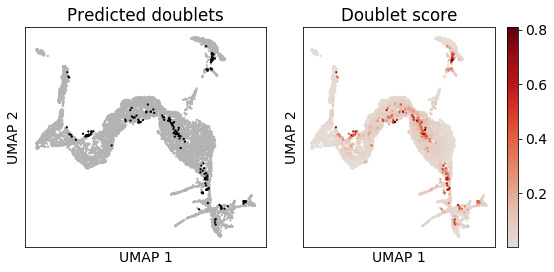

In [14]:
scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [19]:
np.savetxt(config.in_data_intermediate('cite-seq/scrublet_scores.txt'),
           scrub.doublet_scores_obs_)

In [20]:
scrub.doublet_scores_obs_.shape

(7863,)

In [21]:
scrub.detectable_doublet_fraction_

0.46152867862139135

In [22]:
scrub.detected_doublet_rate_

0.02200178049090678

In [23]:
scrub.threshold_

0.27183069446738434